In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [2]:
ic50 = pd.read_csv("../data/drug/ic50_processed_median.csv")

In [3]:
def plot_best_params(df):
    fig, ax = plt.subplots((df.columns.size - 2) // 2 + 1,
                           2,
                           figsize=(15, 4 * ((df.columns.size - 2) // 2 + 1)))
    count = 0
    for col in df.columns:
        if col != 'Drug Id':
            if (df.columns.size - 1) <= 2:
                sns.countplot(df[col], ax=ax[count])
            else:
                sns.countplot(df[col], ax=ax[count // 2, count % 2])
            count += 1

# tissue type - baseline

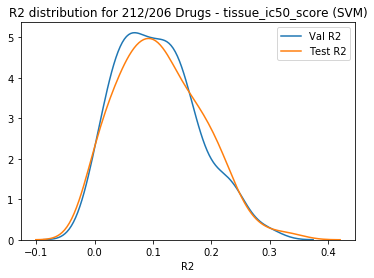

In [128]:
tissue_ic50_score = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202003231213.csv")

sns.distplot(tissue_ic50_score['val_score'], hist=False, label='Val R2')
sns.distplot(tissue_ic50_score['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - tissue_ic50_score (SVM)')
plt.xlabel("R2")
plt.show()

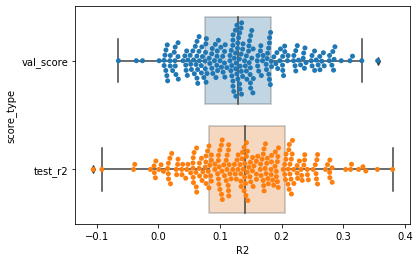

In [47]:
tissue_type_df = pd.melt(tissue_ic50_score[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=tissue_type_df,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=tissue_type_df, orient='h')

# RNA - baseline

## Elastic Net

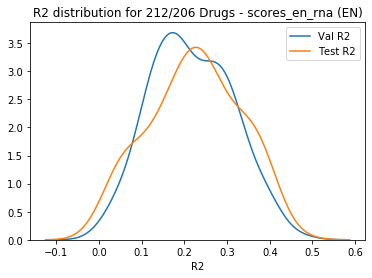

In [48]:
scores_en_rna = pd.read_csv("../work_dirs/rna/ElasticNet/scores_202003141741.csv")

sns.distplot(scores_en_rna['val_score'], hist=False, label='Val R2')
sns.distplot(scores_en_rna['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_en_rna (EN)')
plt.xlabel("R2")
plt.show()

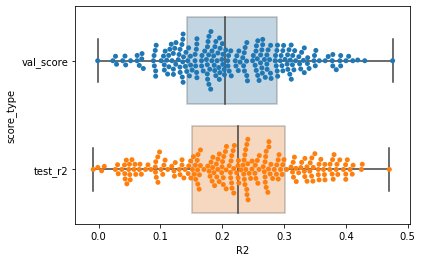

In [49]:
en_rna = pd.melt(scores_en_rna[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=en_rna,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=en_rna, orient='h')

# protein

## raw

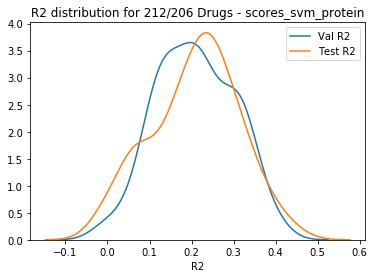

In [50]:
scores_svm_protein = pd.read_csv("../work_dirs/protein/SVM/scores_202003141147.csv")

sns.distplot(scores_svm_protein['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_protein['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_protein')
plt.xlabel("R2")
plt.show()

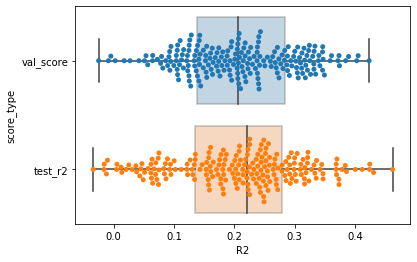

In [51]:
svm_protein = pd.melt(scores_svm_protein[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_protein,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_protein, orient='h')

## median normalised

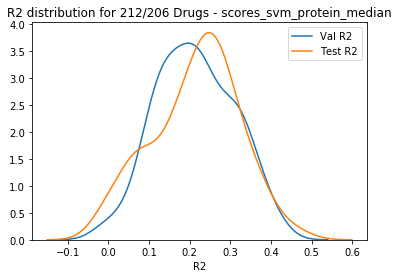

In [52]:
scores_svm_protein_median = pd.read_csv("../work_dirs/protein_median/SVM/scores_202003141549.csv")

sns.distplot(scores_svm_protein_median['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_protein_median['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_protein_median')
plt.xlabel("R2")
plt.show()

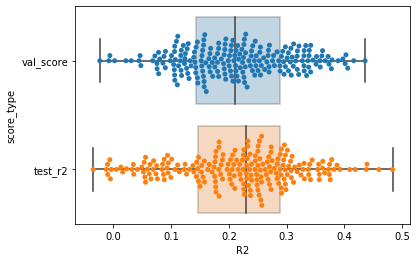

In [53]:
svm_protein_median = pd.melt(scores_svm_protein_median[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_protein_median,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_protein_median, orient='h')

## RUV normalised

## min-max scaled data

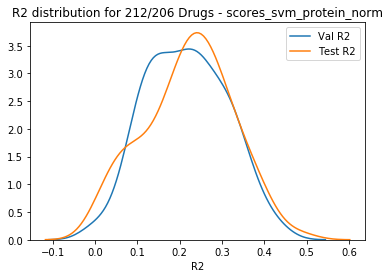

In [54]:
scores_svm_protein_norm = pd.read_csv("../work_dirs/protein_median/SVM/scores_202003161600.csv")

sns.distplot(scores_svm_protein_norm['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_protein_norm['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_protein_norm')
plt.xlabel("R2")
plt.show()

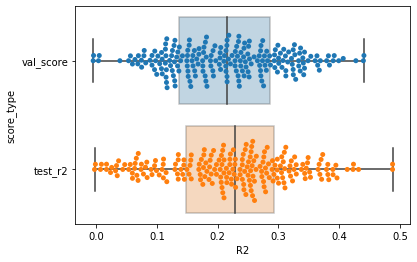

In [55]:
svm_protein_norm = pd.melt(
    scores_svm_protein_norm[['Drug Id', 'val_score', 'test_r2']],
    id_vars='Drug Id',
    value_vars=['val_score', 'test_r2'],
    var_name='score_type',
    value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_protein_norm,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_protein_norm, orient='h')

In [56]:
scores_svm_protein_norm['test_corr'].mean()

0.47301037174333876

In [57]:
scores_svm_protein_norm['test_r2'].mean()

0.22059981489626168

In [58]:
scores_svm_protein_norm['test_mae'].mean()

0.10135885983526934

# peptide(filter 50%)

only select peptides that exist in more than 50% of samples

## raw

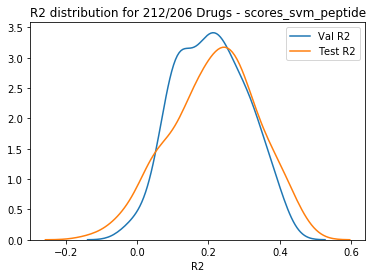

In [59]:
scores_svm_peptide = pd.read_csv("../work_dirs/peptide/SVM/scores_202003142030.csv")

sns.distplot(scores_svm_peptide['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_peptide['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_peptide')
plt.xlabel("R2")
plt.show()

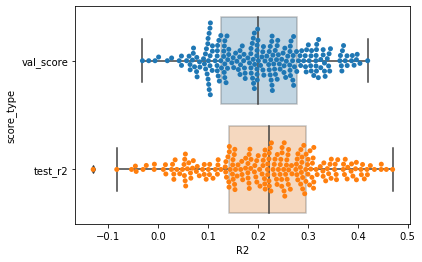

In [60]:
svm_peptide = pd.melt(scores_svm_peptide[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_peptide,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_peptide, orient='h')

## median normalised

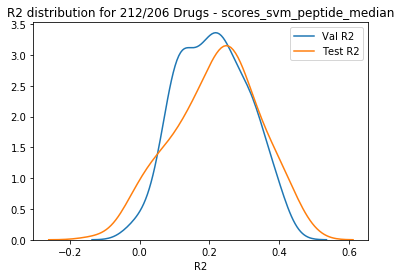

In [61]:
scores_svm_peptide_median = pd.read_csv("../work_dirs/peptide_median/SVM/scores_202003161534.csv")

sns.distplot(scores_svm_peptide_median['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_peptide_median['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_peptide_median')
plt.xlabel("R2")
plt.show()

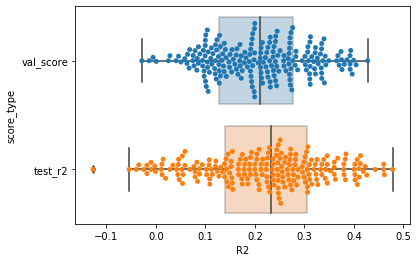

In [62]:
svm_peptide_median = pd.melt(scores_svm_peptide_median[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_peptide_median,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_peptide_median, orient='h')

## RUV normalised

# comparison

## test scores

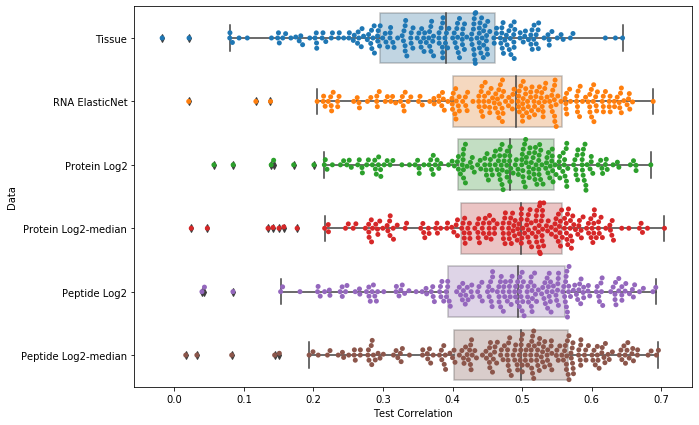

In [129]:
metric = 'test_corr'
tmp = pd.DataFrame({
    'Drug Id': tissue_ic50_score['Drug Id'],
    'Tissue': tissue_ic50_score[metric],
    'RNA ElasticNet': scores_en_rna[metric],
    'Protein Log2': scores_svm_protein[metric],
    'Protein Log2-median': scores_svm_protein_median[metric],
    'Peptide Log2': scores_svm_peptide[metric],
    'Peptide Log2-median': scores_svm_peptide_median[metric]
})
tmp_melt = pd.melt(tmp, id_vars=['Drug Id'], var_name='Data', value_name='Test Correlation')

plt.figure(figsize=(10,7))
ax = sns.boxplot('Test Correlation',
                 'Data',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('Test Correlation', 'Data', data=tmp_melt, orient='h')

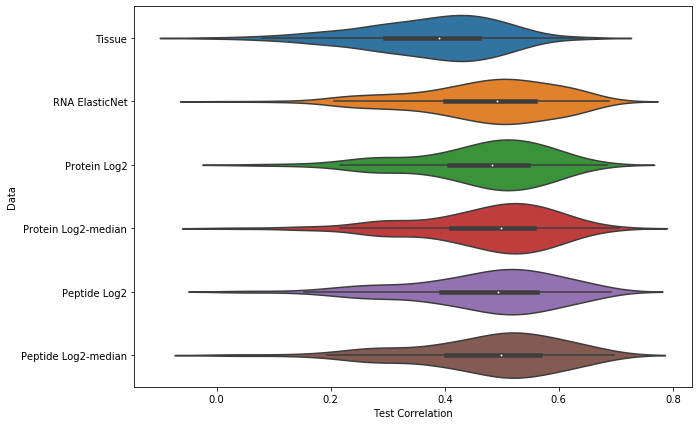

In [130]:
plt.figure(figsize=(10, 7))
ax = sns.violinplot('Test Correlation',
                    'Data',
                    data=tmp_melt,
                    orient='h',
                    boxprops=dict(alpha=.3))

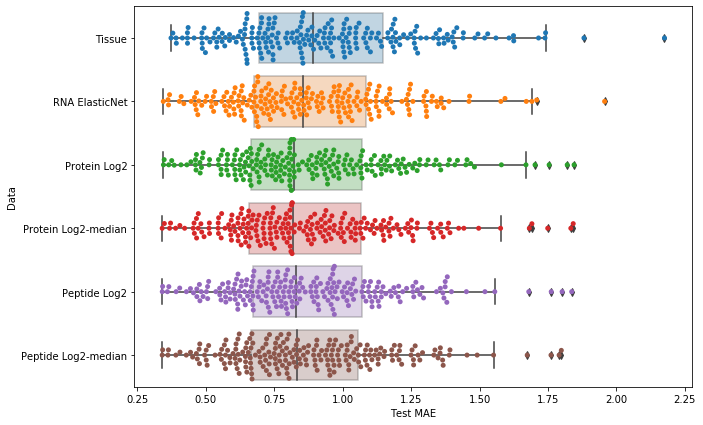

In [66]:
metric = 'test_mae'
tmp = pd.DataFrame({
    'Drug Id': tissue_ic50_score['Drug Id'],
    'Tissue': tissue_ic50_score[metric],
    'RNA ElasticNet': scores_en_rna[metric],
    'Protein Log2': scores_svm_protein[metric],
    'Protein Log2-median': scores_svm_protein_median[metric],
    'Peptide Log2': scores_svm_peptide[metric],
    'Peptide Log2-median': scores_svm_peptide_median[metric]
})
tmp_melt = pd.melt(tmp, id_vars=['Drug Id'], var_name='Data', value_name='Test MAE')

plt.figure(figsize=(10,7))
ax = sns.boxplot('Test MAE',
                 'Data',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('Test MAE', 'Data', data=tmp_melt, orient='h')

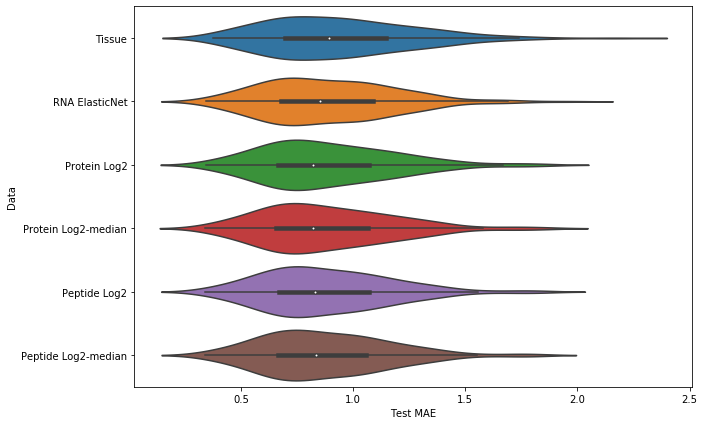

In [67]:
plt.figure(figsize=(10, 7))
ax = sns.violinplot('Test MAE',
                    'Data',
                    data=tmp_melt,
                    orient='h',
                    boxprops=dict(alpha=.3))

## validation

In [ ]:
tissue_ic50_score
scores_en_rna
scores_svm_protein
scores_svm_protein_median
scores_svm_peptide
scores_svm_peptide_median

In [131]:
cols = ['Drug Id', 'cv0_r2', 'cv1_r2', 'cv2_r2', 'cv3_r2', 'cv4_r2']
tissue_ic50_score_melt = pd.melt(tissue_ic50_score[cols],
                                 id_vars='Drug Id',
                                 var_name='CV',
                                 value_name='CV R2')
tissue_ic50_score_melt['Data'] = 'Tissue'

scores_en_rna_melt = pd.melt(scores_en_rna[cols],
                             id_vars='Drug Id',
                             var_name='CV',
                             value_name='CV R2')
scores_en_rna_melt['Data'] = 'RNA ElasticNet'

scores_svm_protein_melt = pd.melt(scores_svm_protein[cols],
                                  id_vars='Drug Id',
                                  var_name='CV',
                                  value_name='CV R2')
scores_svm_protein_melt['Data'] = 'Protein Log2'

scores_svm_protein_median_melt = pd.melt(scores_svm_protein_median[cols],
                                         id_vars='Drug Id',
                                         var_name='CV',
                                         value_name='CV R2')
scores_svm_protein_median_melt['Data'] = 'Protein Log2-median'

scores_svm_peptide_melt = pd.melt(scores_svm_peptide[cols],
                                  id_vars='Drug Id',
                                  var_name='CV',
                                  value_name='CV R2')
scores_svm_peptide_melt['Data'] = 'Peptide Log2'

scores_svm_peptide_median_melt = pd.melt(scores_svm_peptide_median[cols],
                                         id_vars='Drug Id',
                                         var_name='CV',
                                         value_name='CV R2')
scores_svm_peptide_median_melt['Data'] = 'Peptide Log2-median'

combined_val = pd.concat([
    tissue_ic50_score_melt, scores_en_rna_melt, scores_svm_protein_melt,
    scores_svm_protein_median_melt, scores_svm_peptide_melt,
    scores_svm_peptide_median_melt
])

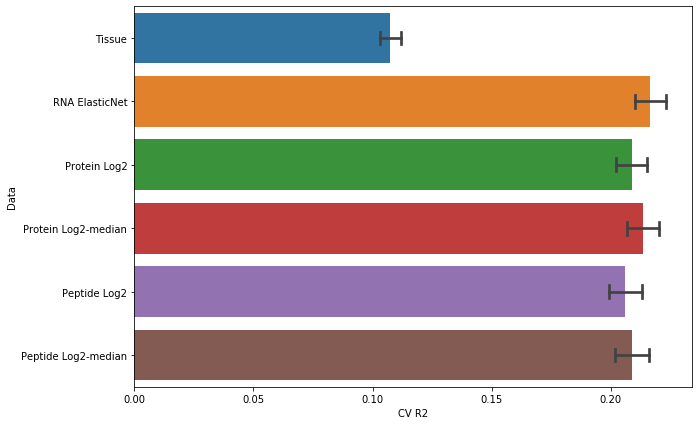

In [132]:
plt.figure(figsize=(10,7))
sns.barplot(y='Data',x='CV R2', data=combined_val, capsize=.2)

In [133]:
combined_val.groupby(['Data'])['CV R2'].agg('std') / combined_val.groupby(['Data'])['CV R2'].agg('mean')

Data
Peptide Log2           0.565403
Peptide Log2-median    0.559545
Protein Log2           0.525768
Protein Log2-median    0.524461
RNA ElasticNet         0.505844
Tissue                 0.684068
Name: CV R2, dtype: float64

# AUC comparison

## min 900 cell lines

### en rna

In [226]:
scores_en_rna_norm = pd.read_csv("../work_dirs/rna_norm_auc/ElasticNet/scores_202003271543_900.csv")
print(scores_en_rna_norm['test_corr'].median())
print(scores_en_rna_norm['test_r2'].median())
print(scores_en_rna_norm['test_mae'].median())

print(scores_en_rna_norm['test_corr'].std() /
      scores_en_rna_norm['test_corr'].mean())
print(scores_en_rna_norm['test_r2'].std() /
      scores_en_rna_norm['test_r2'].mean())
print(scores_en_rna_norm['test_mae'].std() /
      scores_en_rna_norm['test_mae'].mean())

0.42997704931099456
0.15205898163671155
0.056626056372899816
0.3723335900478256
0.8451741923603818
0.6593255619500844


### svm protein

In [227]:
scores_svm_protein_norm = pd.read_csv("../work_dirs/protein_median_auc/SVM/scores_202003271544_900.csv")
print(scores_svm_protein_norm['test_corr'].median())
print(scores_svm_protein_norm['test_r2'].median())
print(scores_svm_protein_norm['test_mae'].median())

print(scores_svm_protein_norm['test_corr'].std() /
      scores_svm_protein_norm['test_corr'].mean())
print(scores_svm_protein_norm['test_r2'].std() /
      scores_svm_protein_norm['test_r2'].mean())
print(scores_svm_protein_norm['test_mae'].std() /
      scores_svm_protein_norm['test_mae'].mean())

0.40981239360179533
0.047813213590784165
0.07417928076134991
0.5481750956792234
-4.052595786246593
0.3933626584441529


### multi-drug

In [229]:
scores_multi_protein_norm = pd.read_csv(
    "../work_dirs/protein/MultiDrugAUC/scores_202003271557_900.csv"
)

In [230]:
scores_multi_protein_norm_test = scores_multi_protein_norm[
    scores_multi_protein_norm['run'] == 'test'].reset_index(drop=True)

In [231]:
max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

max_epoch[max_epoch['corr']==max_epoch['corr'].max()]

,epoch,corr
126,127,0.444604


In [232]:
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==140]['corr'].median()

0.44261118328186794

In [237]:
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] == 140][
    'corr'].std() / scores_multi_protein_norm_test[
        scores_multi_protein_norm_test['epoch'] == 140]['corr'].mean()

0.4344297653637439

### all together

In [187]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==140][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

Text(0.5, 1.0, 'Test set correlation on 212 drugs')

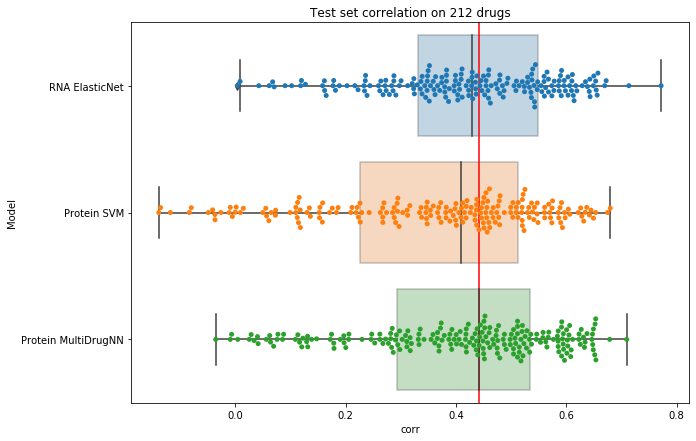

In [188]:
tmp = pd.DataFrame({
    'Drug Id': scores_svm_protein_norm['Drug Id'],
    'RNA ElasticNet': scores_en_rna_norm['test_corr'],
    'Protein SVM': scores_svm_protein_norm['test_corr'],
})
tmp_melt = pd.melt(tmp,
                   id_vars=['Drug Id'],
                   var_name='Model',
                   value_name='corr')
tmp_melt = pd.concat([tmp_melt, multi_res], sort=False)

plt.figure(figsize=(10, 7))
ax = sns.boxplot('corr',
                 'Model',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 212 drugs")

Text(0.5, 1.0, 'Test set correlation on 212 drugs')

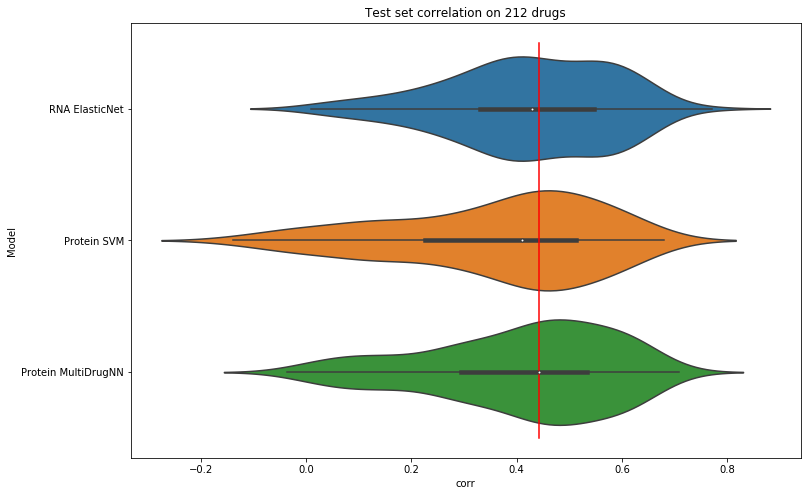

In [189]:
plt.figure(figsize=(12, 8))
sns.violinplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='MultiDrugNN']['corr'].median()+0.001
plt.plot([x, x], [-0.5,2.5], color='red')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 212 drugs")

### cross validation score

In [190]:
cols = ['Drug Id', 'cv0_r2', 'cv1_r2', 'cv2_r2', 'cv3_r2', 'cv4_r2']

scores_en_rna_norm_melt = pd.melt(scores_en_rna_norm[cols],
                             id_vars='Drug Id',
                             var_name='run',
                             value_name='CV R2')
scores_en_rna_norm_melt['Model'] = 'RNA ElasticNet'


scores_svm_protein_median_norm_melt = pd.melt(scores_svm_protein_norm[cols],
                                         id_vars='Drug Id',
                                         var_name='run',
                                         value_name='CV R2')
scores_svm_protein_median_norm_melt['Model'] = 'Protein SVM'


combined_val = pd.concat([
    scores_en_rna_norm_melt,
#     scores_svm_protein_median_norm_melt
])

In [191]:
scores_multi_protein_norm_cv = scores_multi_protein_norm[
    (scores_multi_protein_norm['run'] != 'test')
    & (scores_multi_protein_norm['epoch'] == 139)].reset_index(drop=True)

In [192]:
scores_multi_protein_norm_cv['CV R2'] = scores_multi_protein_norm_cv['corr'] ** 2
scores_multi_protein_norm_cv['Model'] = 'Protein MultiDrugNN'

In [193]:
combined_val = pd.concat([combined_val, scores_multi_protein_norm_cv], sort=False)

In [194]:
combined_val['CV corr'] = combined_val['CV R2'] ** 0.5

Text(0.5, 1.0, 'Stability from CV scores on 212 drugs')

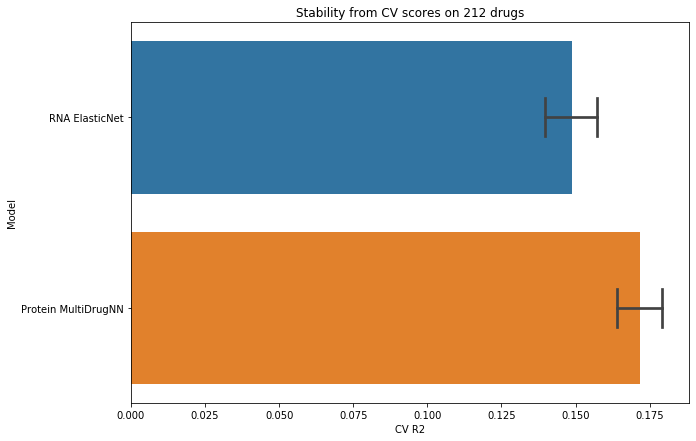

In [195]:
plt.figure(figsize=(10,7))
sns.barplot(y='Model',x='CV R2', data=combined_val, capsize=.2)
plt.title("Stability from CV scores on 212 drugs")

Text(0.5, 1.0, 'Stability from CV scores on 212 drugs')

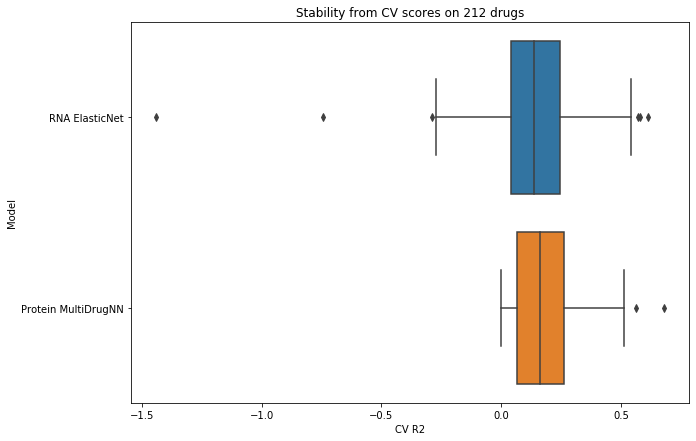

In [196]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Model',x='CV R2', data=combined_val)
plt.title("Stability from CV scores on 212 drugs")

Text(0.5, 1.0, 'Stability from CV scores on 212 drugs')

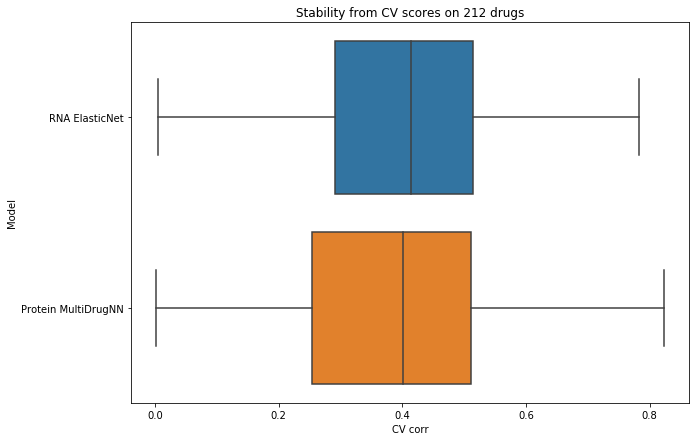

In [197]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Model',x='CV corr', data=combined_val)
plt.title("Stability from CV scores on 212 drugs")

In [198]:
print(combined_val[combined_val['Model']=='RNA ElasticNet']['CV R2'].median())
print(scores_svm_protein_median_norm_melt['CV R2'].median()) 
print(combined_val[combined_val['Model']=='Protein MultiDrugNN']['CV R2'].median())

0.13733683412228087
0.05019486476797336
0.16095680606200263


In [199]:
print(combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].std() /
      combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].mean())
print(scores_svm_protein_median_norm_melt['CV R2'].std()/
      scores_svm_protein_median_norm_melt['CV R2'].mean())
print(combined_val[combined_val['Model'] == 'Protein MultiDrugNN']
      ['CV R2'].std()/
      combined_val[combined_val['Model'] == 'Protein MultiDrugNN']['CV R2'].mean())

0.9773468047112626
-4.075223264735733
0.7307580146607309


## min 300 cell lines

In [239]:
scores_en_rna_norm = pd.read_csv("../work_dirs/rna_norm_auc/ElasticNet/scores_202003271539.csv")
print(scores_en_rna_norm['test_corr'].median())
print(scores_en_rna_norm['test_r2'].median())
print(scores_en_rna_norm['test_mae'].median())

print(scores_en_rna_norm['test_corr'].std() /
      scores_en_rna_norm['test_corr'].mean())
print(scores_en_rna_norm['test_r2'].std() /
      scores_en_rna_norm['test_r2'].mean())
print(scores_en_rna_norm['test_mae'].std() /
      scores_en_rna_norm['test_mae'].mean())

0.39618563022853337
0.1178898447072595
0.05596608934844755
0.4033234377338172
0.952037890185051
0.7109024458260023


In [240]:
scores_svm_protein_norm = pd.read_csv(
    "../work_dirs/protein_median_auc/SVM/scores_202003271541.csv")
print(scores_svm_protein_norm['test_corr'].median())
print(scores_svm_protein_norm['test_r2'].median())
print(scores_svm_protein_norm['test_mae'].median())

print(scores_svm_protein_norm['test_corr'].std() /
      scores_svm_protein_norm['test_corr'].mean())
print(scores_svm_protein_norm['test_r2'].std() /
      scores_svm_protein_norm['test_r2'].mean())
print(scores_svm_protein_norm['test_mae'].std() /
      scores_svm_protein_norm['test_mae'].mean())

0.383175497137817
0.02892447255477143
0.07317620045872558
0.5863813530575444
-3.481132241641606
0.44099239899708115


In [241]:
scores_multi_protein_norm = pd.read_csv(
    "../work_dirs/protein/MultiDrugAUC/scores_202003271555_300.csv"
)

In [242]:
scores_multi_protein_norm_test = scores_multi_protein_norm[
    scores_multi_protein_norm['run'] == 'test'].reset_index(drop=True)

In [243]:
max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

max_epoch[max_epoch['corr']==max_epoch['corr'].max()]

,epoch,corr
139,140,0.408571


In [244]:
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               140]['corr'].median()

0.40857093692891344

In [245]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==140][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

Text(0.5, 1.0, 'Test set correlation on 446 drugs')

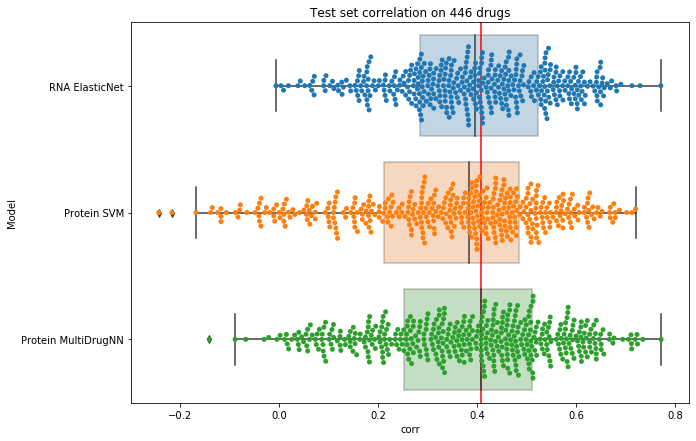

In [246]:
tmp = pd.DataFrame({
    'Drug Id': scores_svm_protein_norm['Drug Id'],
    'RNA ElasticNet': scores_en_rna_norm['test_corr'],
    'Protein SVM': scores_svm_protein_norm['test_corr'],
})
tmp_melt = pd.melt(tmp,
                   id_vars=['Drug Id'],
                   var_name='Model',
                   value_name='corr')
tmp_melt = pd.concat([tmp_melt, multi_res], sort=False)

plt.figure(figsize=(10, 7))
ax = sns.boxplot('corr',
                 'Model',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 446 drugs")

Text(0.5, 1.0, 'Test set correlation on 446 drugs')

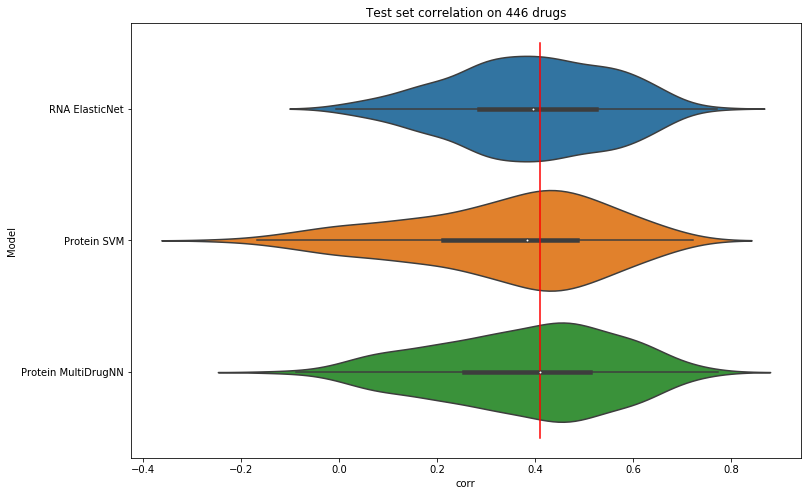

In [247]:
plt.figure(figsize=(12, 8))
sns.violinplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='MultiDrugNN']['corr'].median()+0.001
plt.plot([x, x], [-0.5,2.5], color='red')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 446 drugs")

### cross validation score

In [248]:
cols = ['Drug Id', 'cv0_r2', 'cv1_r2', 'cv2_r2', 'cv3_r2', 'cv4_r2']

scores_en_rna_norm_melt = pd.melt(scores_en_rna_norm[cols],
                             id_vars='Drug Id',
                             var_name='run',
                             value_name='CV R2')
scores_en_rna_norm_melt['Model'] = 'RNA ElasticNet'


scores_svm_protein_median_norm_melt = pd.melt(scores_svm_protein_norm[cols],
                                         id_vars='Drug Id',
                                         var_name='run',
                                         value_name='CV R2')
scores_svm_protein_median_norm_melt['Model'] = 'Protein SVM'


combined_val = pd.concat([
    scores_en_rna_norm_melt,
#     scores_svm_protein_median_norm_melt
])

In [249]:
scores_multi_protein_norm_cv = scores_multi_protein_norm[
    (scores_multi_protein_norm['run'] != 'test')
    & (scores_multi_protein_norm['epoch'] == 140)].reset_index(drop=True)

In [250]:
scores_multi_protein_norm_cv['CV R2'] = scores_multi_protein_norm_cv['corr'] ** 2
scores_multi_protein_norm_cv['Model'] = 'Protein MultiDrugNN'

In [251]:
combined_val = pd.concat([combined_val, scores_multi_protein_norm_cv], sort=False)

In [252]:
combined_val['CV corr'] = combined_val['CV R2'] ** 0.5

Text(0.5, 1.0, 'Stability from CV scores on 446 drugs')

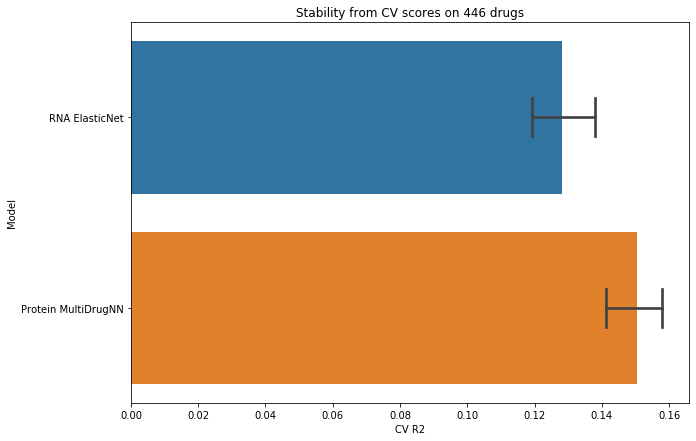

In [253]:
plt.figure(figsize=(10,7))
sns.barplot(y='Model',x='CV R2', data=combined_val,ci=100, capsize=.2)
plt.title("Stability from CV scores on 446 drugs")

In [254]:
print(combined_val[combined_val['Model']=='RNA ElasticNet']['CV R2'].median())
print(scores_svm_protein_median_norm_melt['CV R2'].median()) 
print(combined_val[combined_val['Model']=='Protein MultiDrugNN']['CV R2'].median())

print(combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].std() /
      combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].mean())
print(scores_svm_protein_median_norm_melt['CV R2'].std()/
      scores_svm_protein_median_norm_melt['CV R2'].mean())
print(combined_val[combined_val['Model'] == 'Protein MultiDrugNN']
      ['CV R2'].std()/
      combined_val[combined_val['Model'] == 'Protein MultiDrugNN']['CV R2'].mean())

0.10737944996712184
0.009099031910962452
0.12710336925231017
1.113973847402147
-3.7494186745380547
0.8199562754511223


## which drugs are improved？

In [255]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")

In [256]:
drug_meta['TARGET_PATHWAY'].unique()

array(['EGFR signaling', 'PI3K/MTOR signaling', 'RTK signaling',
       'Protein stability and degradation', 'Mitosis', 'Other',
       'ERK MAPK signaling', 'Other, kinases', 'ABL signaling',
       'Cell cycle', 'IGF1R signaling', 'Chromatin histone acetylation',
       'Cytoskeleton', 'DNA replication', 'Hormone-related',
       'Genome integrity', 'WNT signaling', 'JNK and p38 signaling',
       'Chromatin other', 'Metabolism', 'Apoptosis regulation',
       'Chromatin histone methylation', 'p53 pathway', 'Unclassified'],
      dtype=object)

### compare with RNA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

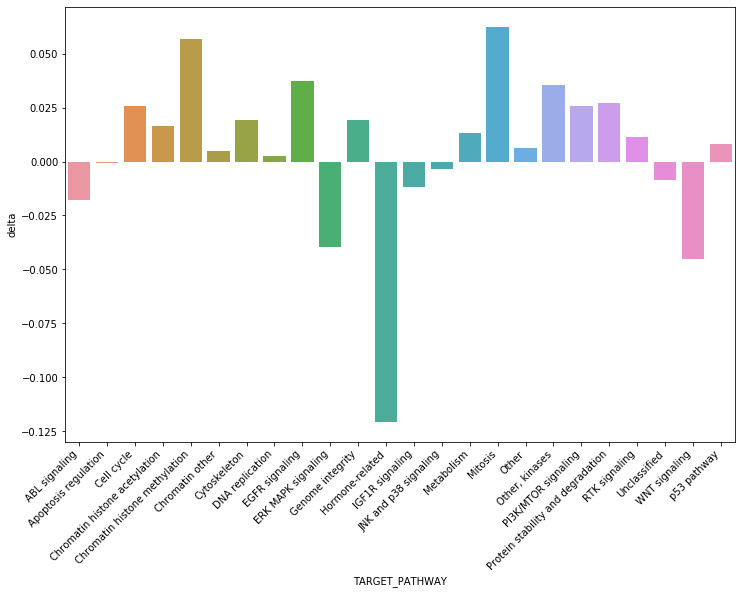

In [257]:
tmp = pd.merge(scores_en_rna_norm[['Drug Id','test_corr']], multi_res[['Drug Id','corr']])

tmp.columns = ['Drug Id', 'RNA_correlation', 'MultiDrug_correlation']

tmp['delta'] = tmp['MultiDrug_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])
tmp['improved'] = (tmp['MultiDrug_correlation'] > tmp['RNA_correlation']).astype(int)

delta_bar = tmp.groupby(['TARGET_PATHWAY'])['RNA_correlation','MultiDrug_correlation','delta'].mean().reset_index()

plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY', y='delta', data=delta_bar)
plt.xticks(rotation=45, ha='right')

No handles with labels found to put in legend.


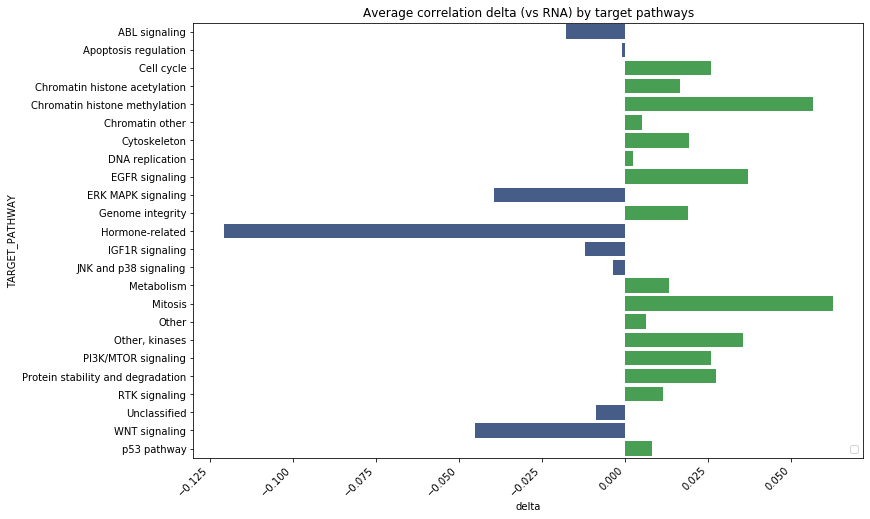

In [258]:
tmp = pd.merge(scores_en_rna_norm[['Drug Id', 'test_corr']],
               multi_res[['Drug Id', 'corr']])

tmp.columns = ['Drug Id', 'RNA_correlation', 'MultiDrug_correlation']

tmp['delta'] = tmp['MultiDrug_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])
tmp['improved'] = (tmp['MultiDrug_correlation'] >
                   tmp['RNA_correlation']).astype(int)

delta_bar = tmp.groupby([
    'TARGET_PATHWAY'
])['RNA_correlation', 'MultiDrug_correlation', 'delta'].mean().reset_index()

delta_bar['category'] = delta_bar['delta'].map(lambda x: 'increase'
                                               if x > 0 else 'decrease')
delta_bar['color'] = delta_bar['delta'].map(lambda x: sns.xkcd_rgb[
    "medium green"] if x > 0 else sns.xkcd_rgb["denim blue"])
plt.figure(figsize=(12, 8))
plt.title("Average correlation delta (vs RNA) by target pathways")
g = sns.barplot(
    x='delta',
    y='TARGET_PATHWAY',
    #     hue='category',
    data=delta_bar,
    palette=delta_bar['color'].values)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

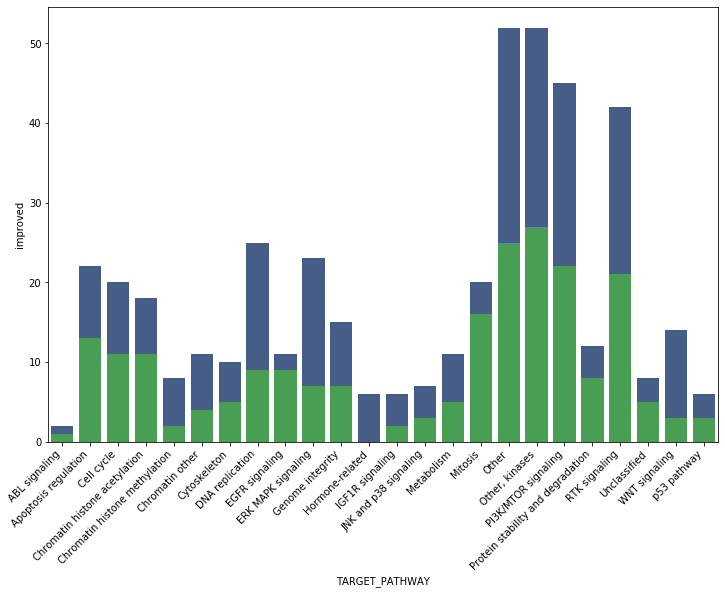

In [38]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color=sns.xkcd_rgb["denim blue"])
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color=sns.xkcd_rgb["medium green"])
plt.xticks(rotation=45, ha='right')

### compare with protein SVM

No handles with labels found to put in legend.


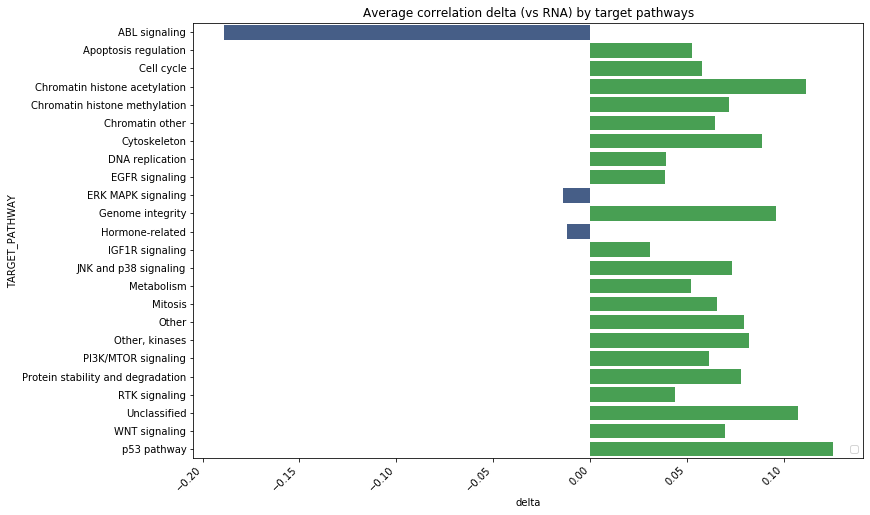

In [96]:
tmp = pd.merge(scores_svm_protein_norm[['Drug Id', 'test_corr']],
               multi_res[['Drug Id', 'corr']])

tmp.columns = ['Drug Id', 'RNA_correlation', 'MultiDrug_correlation']

tmp['delta'] = tmp['MultiDrug_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])
tmp['improved'] = (tmp['MultiDrug_correlation'] >
                   tmp['RNA_correlation']).astype(int)

delta_bar = tmp.groupby([
    'TARGET_PATHWAY'
])['RNA_correlation', 'MultiDrug_correlation', 'delta'].mean().reset_index()

delta_bar['category'] = delta_bar['delta'].map(lambda x: 'increase'
                                               if x > 0 else 'decrease')
delta_bar['color'] = delta_bar['delta'].map(lambda x: sns.xkcd_rgb[
    "medium green"] if x > 0 else sns.xkcd_rgb["denim blue"])
plt.figure(figsize=(12, 8))
plt.title("Average correlation delta (vs RNA) by target pathways")
g = sns.barplot(
    x='delta',
    y='TARGET_PATHWAY',
    #     hue='category',
    data=delta_bar,
    palette=delta_bar['color'].values)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

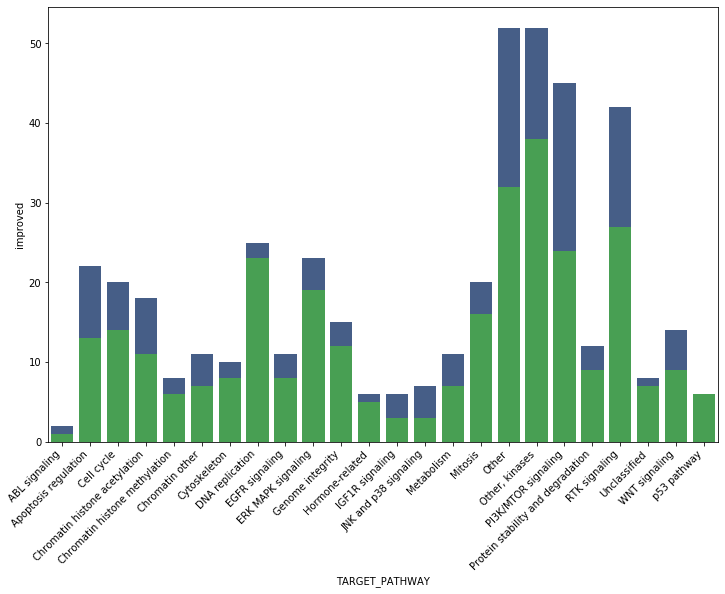

In [67]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color=sns.xkcd_rgb["denim blue"])
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color=sns.xkcd_rgb["medium green"])
plt.xticks(rotation=45, ha='right')

In [71]:
drug_meta[drug_meta['DRUG_ID'] == 277]

,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
131,277,MGH,Linifanib,"ABT-869, ABT 869","VEGFR1, VEGFR2, VEGFR3, CSF1R, FLT3, KIT",RTK signaling
